[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-05-park-input)


# 전국 도시 공원 표준 데이터
https://www.data.go.kr/dataset/15012890/standard.do
* 전국 도시 공원 표준데이터에는 데이터를 전처리 해보기에 좋은 데이터가 많습니다.
* 시간, 결측치, 이상치, 수치형, 범주형 데이터를 고르게 볼 수 있으며 다양한 텍스트 데이터 처리를 해볼 수 있습니다.
* 또 정규표현식을 활용해서 텍스트 데이터 전처리와 데이터 마스킹 기법에 대해 다룹니다.
* 그리고 이렇게 전처리한 내용을 바탕으로 전국 도시공원에 대한 분포를 시각화해 봅니다.
* 어떤 공원이 어느 지역에 어떻게 분포되어 있는지를 위경도로 표현해 봅니다.

## 이번 챕터에서 설치가 필요한 도구

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)

* 윈도우
    * <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


### Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 2020년 4월 기준 판다스 1.0 이상 버전을 지원하지 않습니다.
* 아나콘다로 주피터를 설치했다면 : `conda install -c conda-forge pandas-profiling`
* pip로 주피터를 설치했다면 : `pip install pandas-profiling`

### 워드클라우드
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda : `conda install -c conda-forge wordcloud`
* pip : `pip install wordcloud`


## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt

%matplotlib inline

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"

# sns.set(font='Malgun Gothic',
#        rc = {'axes.unicode_minus':False},
#        style = 'darkgrid')

import matplotlib 

# matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

plt.rc("axes", unicode_minus=False)


<AxesSubplot:title={'center':'한글폰트'}>

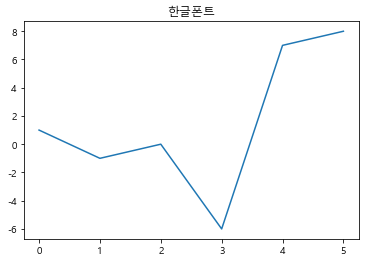

In [3]:
pd.Series([1, -1, 0, -6, 7, 8]).plot(title='한글폰트')

In [4]:
# 그래프가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


## 데이터 로드

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.

df = pd.read_csv(r'C:\\Users\\park\\Documents\\data_set\\lecture_data\\전국도시공원표준데이터.csv', encoding = 'cp949')

df.shape

(18096, 19)

In [6]:
# 미리보기를 합니다.

df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,48250-00039,달래공원,어린이공원,경상남도 김해시 월산로 119,경상남도 김해시 부곡동 803-4,35.204857,128.800645,1990.0,NaN,조합놀이대,NaN,NaN,NaN,1998-12-23,경상남도 김해시청,055-330-6989,2020-12-17,5350000,경상남도 김해시
1,48250-00041,대동공원,근린공원,경상남도 김해시 활천로285번길 14,경상남도 김해시 삼방동 192,35.244564,128.910443,10362.0,NaN,NaN,NaN,NaN,NaN,1990-12-14,경상남도 김해시청,055-330-4414,2020-12-17,5350000,경상남도 김해시
2,48250-00042,대청공원,근린공원,경상남도 김해시 대청로176번길 13,경상남도 김해시 대청동 299,35.191583,128.797572,12712.0,테니스장,NaN,NaN,NaN,야외공연장,1998-12-23,경상남도 김해시청,055-330-6989,2020-12-17,5350000,경상남도 김해시
3,48250-00044,덕숭공원,어린이공원,NaN,경상남도 김해시 어방동 507-4,35.238677,128.900598,2080.0,NaN,놀이터,NaN,NaN,NaN,1994-03-19,경상남도 김해시청,055-330-4414,2020-12-17,5350000,경상남도 김해시
4,48250-00045,덕정공원,근린공원,경상남도 김해시 덕정로 115,경상남도 김해시 관동동 421-1,35.180089,128.797967,57067.0,NaN,NaN,화장실,NaN,NaN,1995-09-30,경상남도 김해시청,055-330-6989,2020-12-17,5350000,경상남도 김해시


## Pandas Profiling
* [pandas-profiling/pandas-profiling: Create HTML profiling reports from pandas DataFrame objects](https://github.com/pandas-profiling/pandas-profiling)

* 별도의 설치가 필요합니다.(folium 을 설치했던 것 처럼 따로 설치해야지만 사용할 수 있습니다.)
* conda : `conda install -c conda-forge pandas-profiling`
* pip : `pip install pandas-profiling`

In [7]:
# 버전에 따라 기능의 차이가 있습니다. 
# 이 강좌에서 사용하는 버전은 다음과 같습니다.

import pandas_profiling

pandas_profiling.__version__

'2.10.0'

* 미리 생성해 놓은 리포트 보기 : https://corazzon.github.io/open-data-analysis-basic/05-park_pandas_profile.html

In [8]:
# pandas profiling 에서 폰트가 깨진다면 아래코드의 주석을 풀고 폰트를 재설정 해보세요.


matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

# Mac

# plt.rc("font", family="AppleGothic")
# Mac
# plt.rc("font", family="AppleGothic")

In [9]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.

# from pandas_profiling import ProfileReport

# %time profile = ProfileReport(df, title='도시공원 표준 데이터')
# profile.to_file(output_file='05-park_pandas_profile.html')

## 기본 정보 보기

In [10]:
# info로 기본 정보를 봅니다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18096 entries, 0 to 18095
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18096 non-null  object 
 1   공원명           18096 non-null  object 
 2   공원구분          18096 non-null  object 
 3   소재지도로명주소      6449 non-null   object 
 4   소재지지번주소       17263 non-null  object 
 5   위도            17860 non-null  float64
 6   경도            17853 non-null  float64
 7   공원면적          18096 non-null  float64
 8   공원보유시설(운동시설)  4876 non-null   object 
 9   공원보유시설(유희시설)  6623 non-null   object 
 10  공원보유시설(편익시설)  5199 non-null   object 
 11  공원보유시설(교양시설)  1126 non-null   object 
 12  공원보유시설(기타시설)  2958 non-null   object 
 13  지정고시일         15626 non-null  object 
 14  관리기관명         16863 non-null  object 
 15  전화번호          16574 non-null  object 
 16  데이터기준일자       18096 non-null  object 
 17  제공기관코드        18096 non-null  object 
 18  제공기관명         18096 non-nu

In [11]:
# 결측치의 수를 구합니다.
df.isnull().sum()


관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        11647
소재지지번주소           833
위도                236
경도                243
공원면적                0
공원보유시설(운동시설)    13220
공원보유시설(유희시설)    11473
공원보유시설(편익시설)    12897
공원보유시설(교양시설)    16970
공원보유시설(기타시설)    15138
지정고시일            2470
관리기관명            1233
전화번호             1522
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [12]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.
round(df.isnull().mean()* 100,2)


관리번호             0.00
공원명              0.00
공원구분             0.00
소재지도로명주소        64.36
소재지지번주소          4.60
위도               1.30
경도               1.34
공원면적             0.00
공원보유시설(운동시설)    73.05
공원보유시설(유희시설)    63.40
공원보유시설(편익시설)    71.27
공원보유시설(교양시설)    93.78
공원보유시설(기타시설)    83.65
지정고시일           13.65
관리기관명            6.81
전화번호             8.41
데이터기준일자          0.00
제공기관코드           0.00
제공기관명            0.00
dtype: float64

## 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

In [13]:
# 폰트 설정이 해제되었다면 다시 설정해 주세요.


<AxesSubplot:>

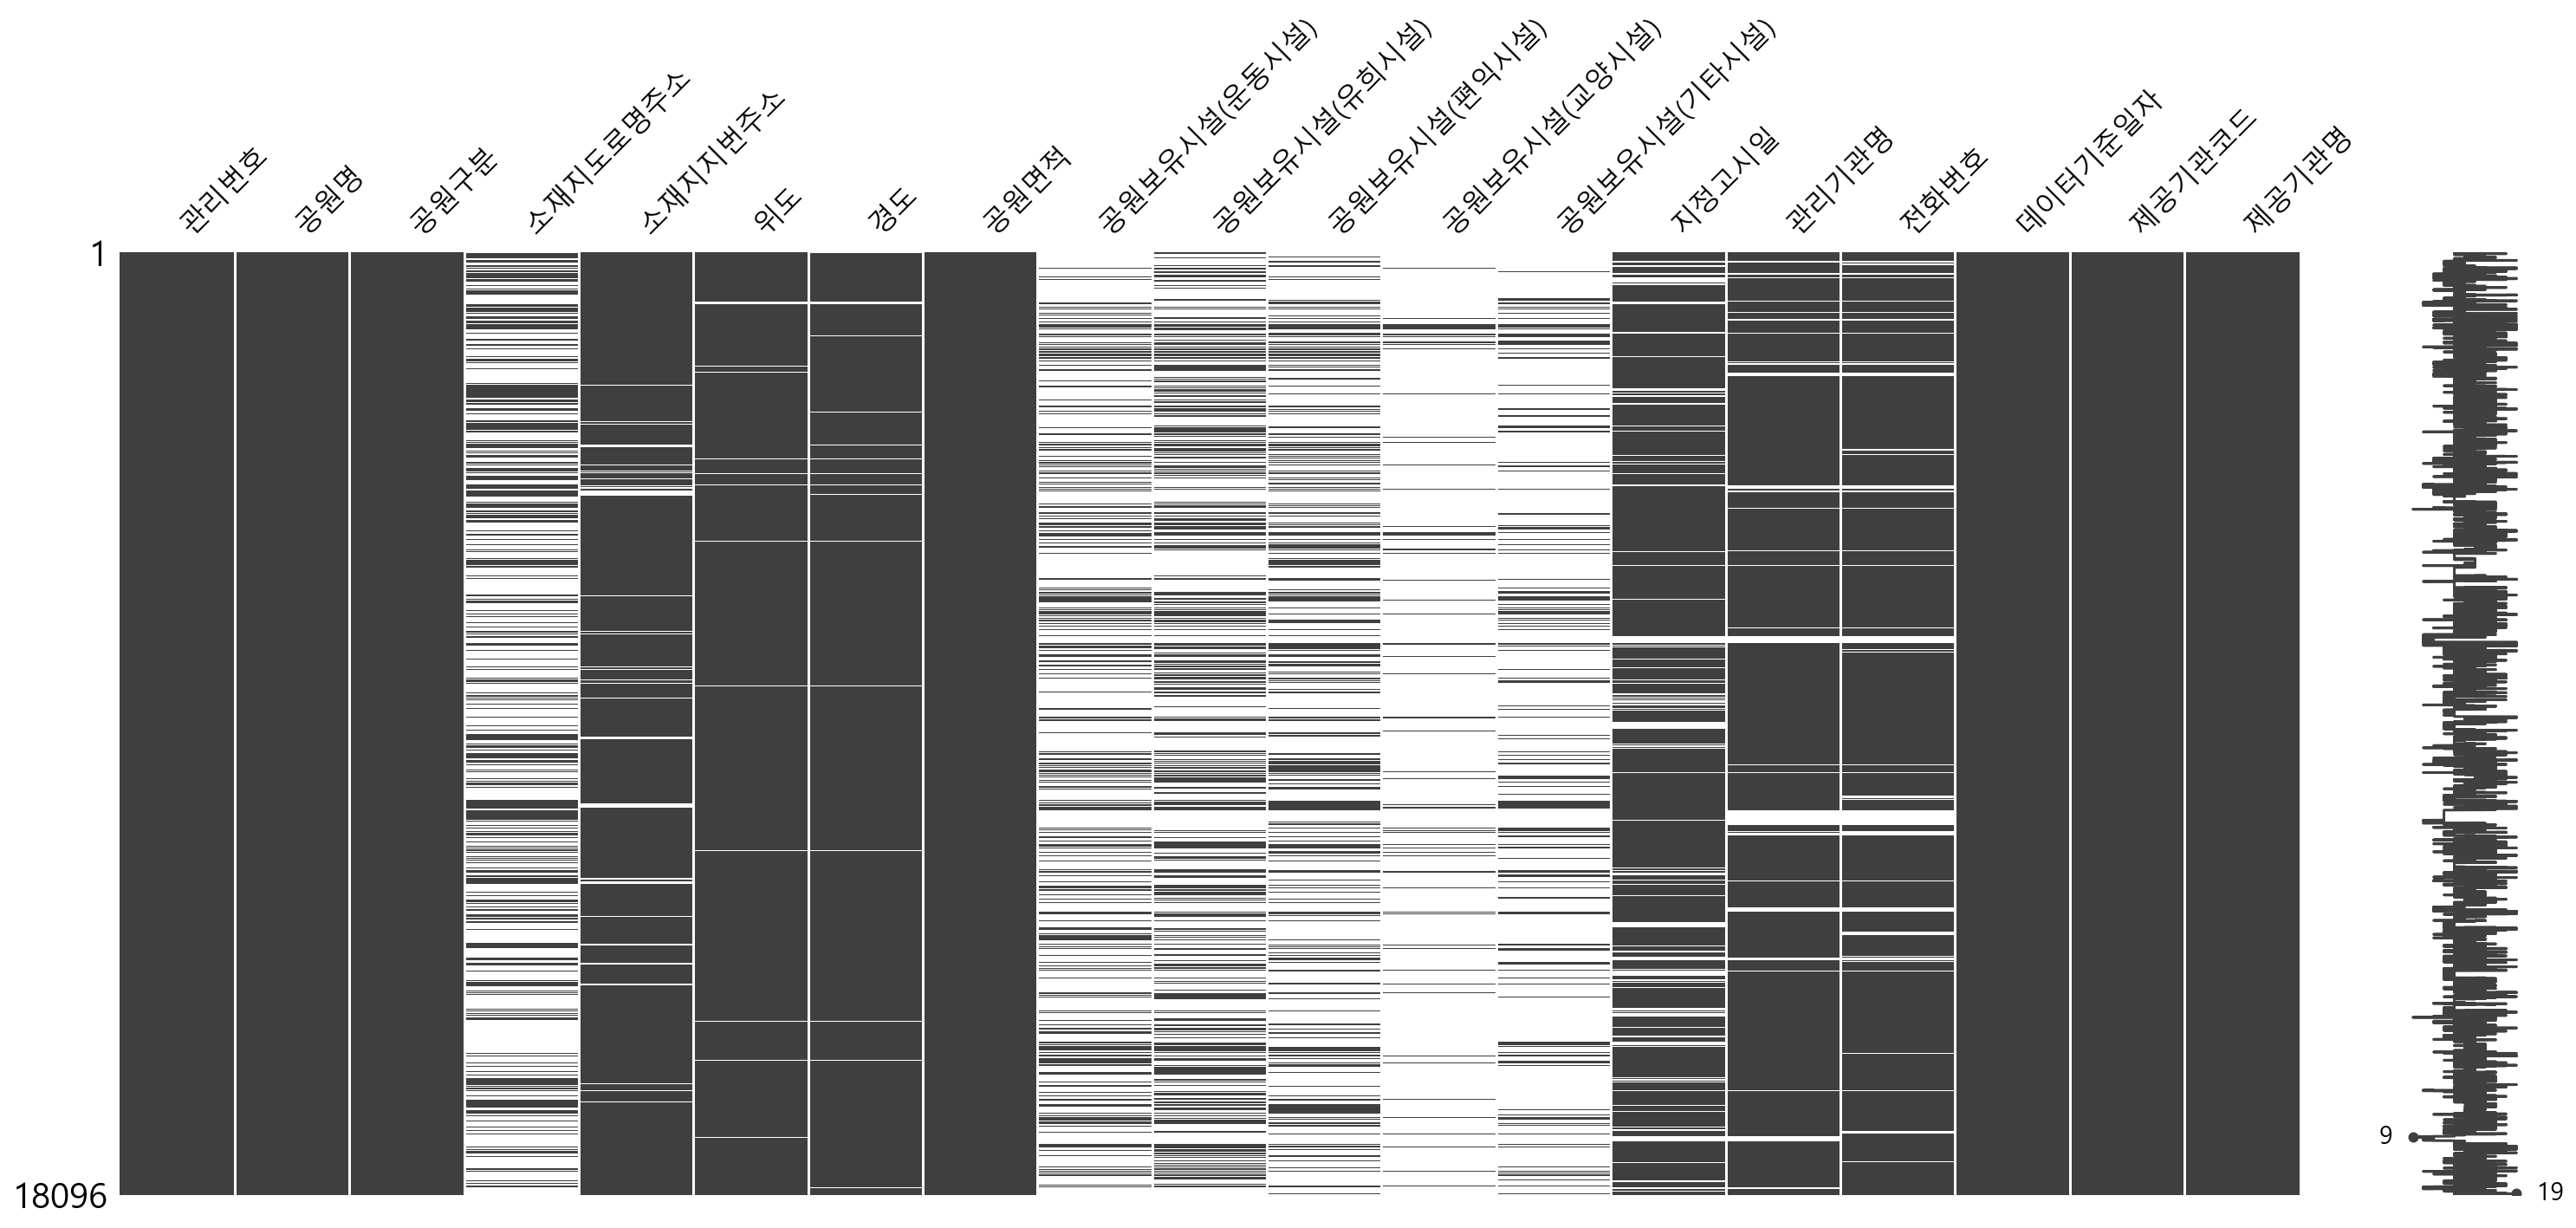

In [14]:
# 이전 챕터에서 설치하지 않았다면 아나콘다에 missingno를 설치합니다. 
# !conda install -c conda-forge missingno
# 라이브러리를 로드합니다.

import missingno

missingno.matrix(df)


* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

<AxesSubplot:>

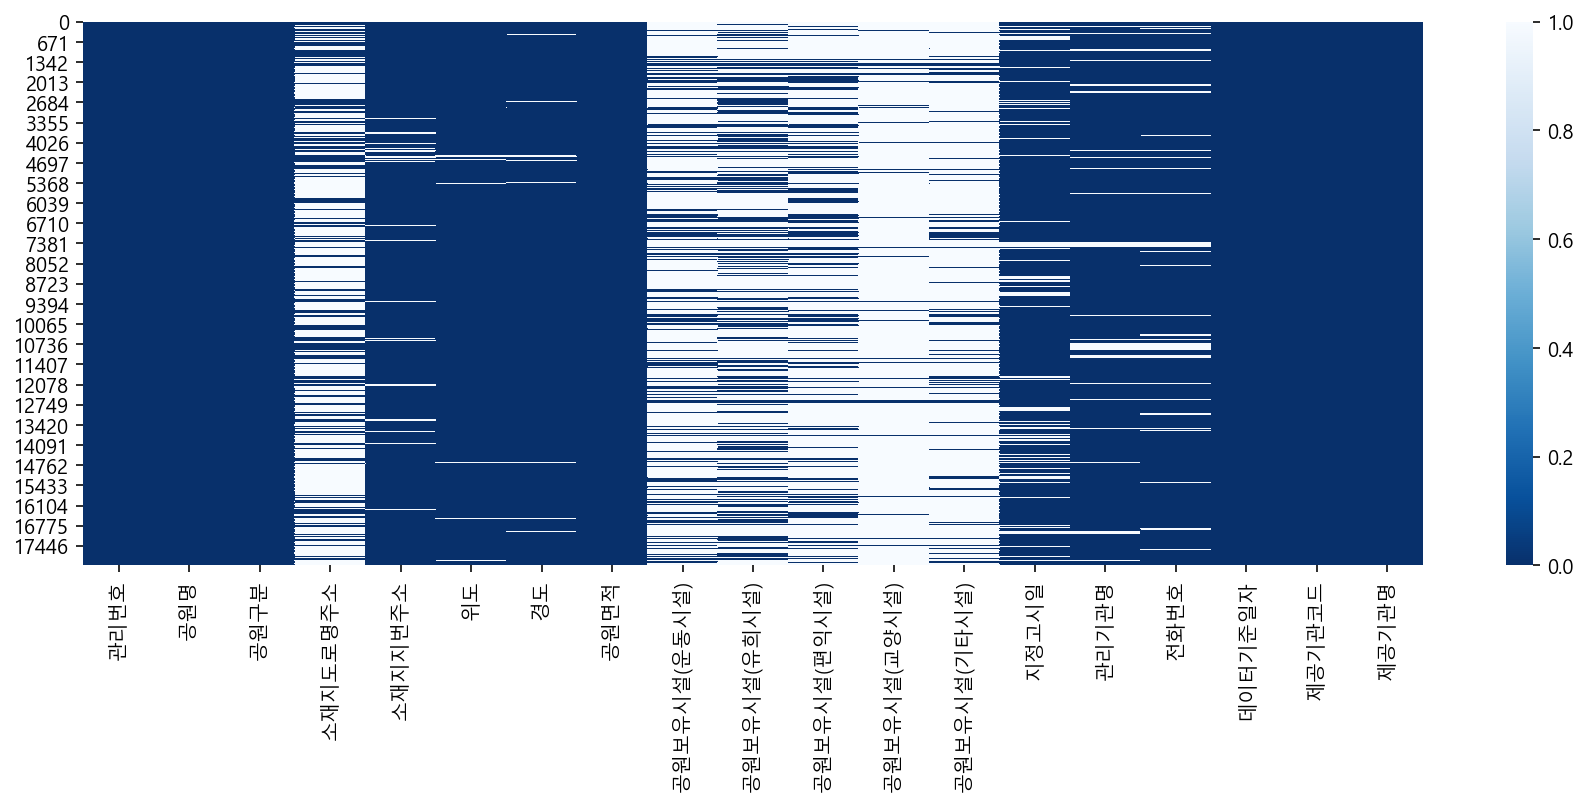

In [15]:
# seaborn을 통해 위와 같은 결측치 그래프를 그려봅니다.

null = df.isnull()
plt.figure(figsize=(15,5))
sns.heatmap(null, cmap = 'Blues_r')

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [16]:
# 전체 컬럼명을 출력해 봅니다.
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [17]:
# drop 으로 'Unnamed: 19' 를 제거하기 (강의에서 사용한 데이터에는 존재)

# df = df.drop(columns='Unnamed: 19', axis=1) 1 : 열
# df

df.shape

(18096, 19)

## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [18]:
# 도로명 주소의 널값 수
df.columns
df['소재지도로명주소'].isnull().sum()

11647

In [19]:
# 지번 주소의 널값 수

df['소재지지번주소'].isnull().sum()

833

In [20]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.

df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(5616, 19)

In [21]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.

df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지지번주소'] = df['소재지지번주소'].fillna(df['소재지도로명주소'])


In [22]:
# "소재지도로명주소"의 결측치수를 세어봅니다.
df['소재지도로명주소'].isnull().sum()

0

In [23]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.

df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [24]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기

df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df[['소재지도로명주소', '시도']].head(3)

,소재지도로명주소,시도
0,경상남도 김해시 월산로 119,경상남도
1,경상남도 김해시 활천로285번길 14,경상남도
2,경상남도 김해시 대청로176번길 13,경상남도


In [25]:
# 구군 가져오기
df['구군'] = df['소재지도로명주소'].str.split(expand=True)[1]
df[['소재지도로명주소', '시도', '구군']].sample(3)

,소재지도로명주소,시도,구군
14331,전라남도 순천시 해룡면 상삼리612,전라남도,순천시
15942,강원도 영월군 주천면 주천로 113-5 일원,강원도,영월군
17188,경기도 고양시 일산동구 중산동 1573-2,경기도,고양시


In [26]:
# 시도 데이터의 빈도수 세어보기

df['시도'].value_counts()

경기도        4011
서울특별시      1864
전라남도       1589
충청남도       1297
경상남도       1162
전라북도       1116
경상북도        892
충청북도        887
광주광역시       856
울산광역시       793
강원도         736
인천광역시       728
부산광역시       696
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
-            40
경남            1
Name: 시도, dtype: int64

In [27]:
# 강원은 "강원도"로 변경해줄 필요가 보입니다.
df['시도'] = df['시도'].replace('경남', '경상남도').replace('-','경상북도')
df['시도'].value_counts()


경기도        4011
서울특별시      1864
전라남도       1589
충청남도       1297
경상남도       1163
전라북도       1116
경상북도        932
충청북도        887
광주광역시       856
울산광역시       793
강원도         736
인천광역시       728
부산광역시       696
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

<AxesSubplot:xlabel='경도', ylabel='위도'>

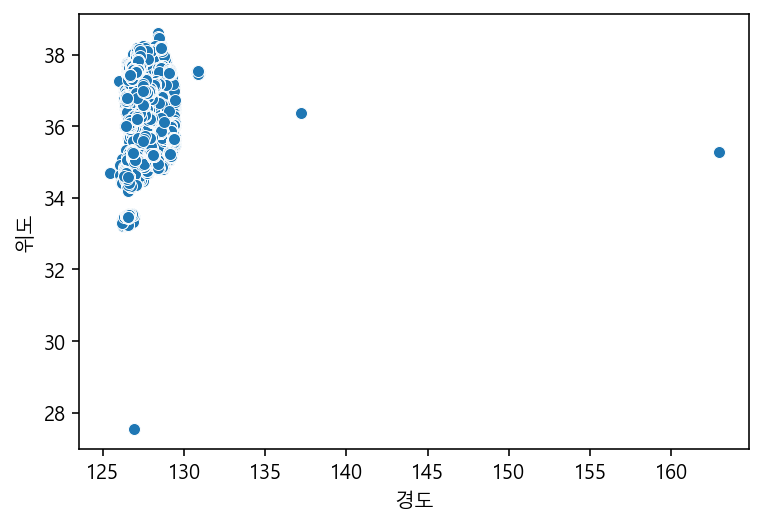

In [28]:
# 위경도 시각화
sns.scatterplot(data=df, x='경도', y='위도')

In [29]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.

df_park = df[(df['경도'] < 133) & (df['위도'] > 32)].copy()

<AxesSubplot:xlabel='경도', ylabel='위도'>

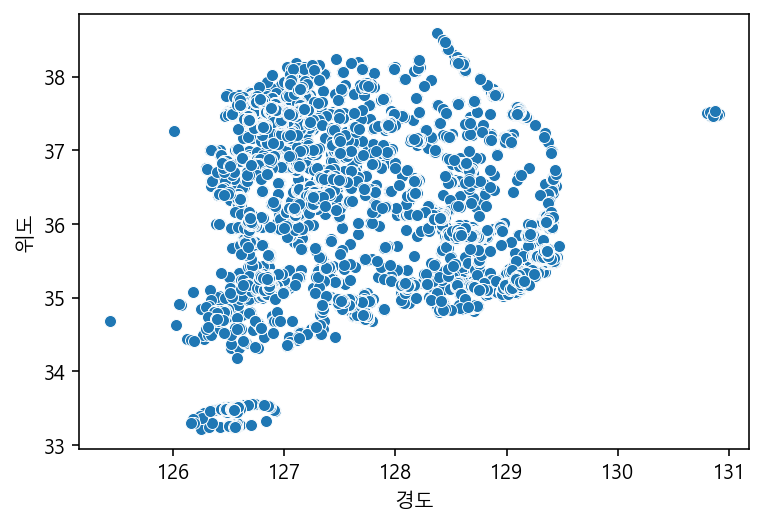

In [30]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함
sns.scatterplot(data=df_park, x='경도', y='위도')

In [31]:
# 위도와 경도의 요약값을 describe 로 봅니다.

df[['위도','경도']].describe()

,위도,경도
count,17860.000000,17853.000000
mean,36.412736,127.497964
std,1.062763,0.903100
min,27.551606,125.432215
25%,35.371624,126.880616
50%,36.552093,127.113905
75%,37.443914,128.107858
max,38.586685,162.920004


In [32]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.

df[(df['경도'] > 133) | (df['위도'] < 32)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
133,46710-00112,공원-112,소공원,전라남도 담양군 대전면 성산리 434-13,전라남도 담양군 대전면 성산리 434-13,35.269633,162.920004,743.0,NaN,NaN,...,NaN,NaN,2007-11-27,담양군청,061-380-3118,2020-12-14,4850000,전라남도 담양군,전라남도,담양군
14663,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2020-07-16,5710000,충청북도 청주시,충청북도,청주시
17563,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2020-05-14,3130000,서울특별시 마포구,서울특별시,마포구


## 날짜 데이터 다루기

In [33]:
# 지정고시일의 데이터 타입을 봅니다.

df['지정고시일'].head(1)

0    1998-12-23
Name: 지정고시일, dtype: object

In [34]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.

df['지정고시일'] = pd.to_datetime(df['지정고시일'])
df['지정고시일']

0       1998-12-23
1       1990-12-14
2       1998-12-23
3       1994-03-19
4       1995-09-30
           ...    
18091   2008-01-02
18092   2008-01-02
18093   2008-01-02
18094   2008-01-02
18095   2008-01-02
Name: 지정고시일, Length: 18096, dtype: datetime64[ns]

In [35]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.
df['고시연도'] = df['지정고시일'].dt.year
df['고시월'] = df['지정고시일'].dt.month

df[['지정고시일','고시연도','고시월']]

,지정고시일,고시연도,고시월
0,1998-12-23,1998.0,12.0
1,1990-12-14,1990.0,12.0
2,1998-12-23,1998.0,12.0
3,1994-03-19,1994.0,3.0
4,1995-09-30,1995.0,9.0
...,...,...,...
18091,2008-01-02,2008.0,1.0
18092,2008-01-02,2008.0,1.0
18093,2008-01-02,2008.0,1.0
18094,2008-01-02,2008.0,1.0


In [36]:
# 화랑공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.

df.loc[df['공원명'].str.contains('화랑'), ['공원명','고시연도']]

,공원명,고시연도
5461,판교제8호(화랑)공원,2004.0
6303,화랑공원,1980.0
8046,화랑,2004.0
15505,화랑공원,2010.0
15721,화랑공원,1969.0
16030,화랑공원,1972.0
17366,화랑,1991.0


C:\Users\park\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\park\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

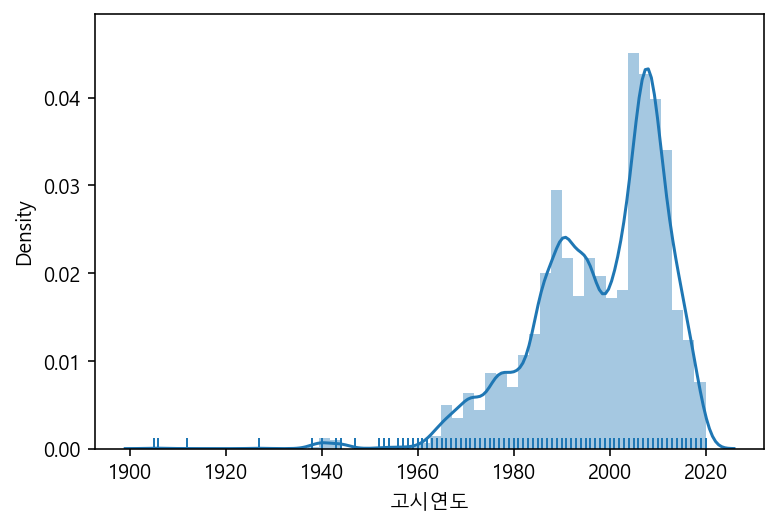

In [37]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.

sns.distplot(df.loc[df['고시연도'].notnull(), '고시연도'], rug=True)

* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [98]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.

year_month = pd.pivot_table(data=df, index='고시연도', columns='고시월', values='공원명', aggfunc = 'count').round(1)
year_month = year_month[(year_month.index > 2000) & (year_month.index < 2021)]
year_month.style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,43.000000,39.000000,7.000000,68.000000,11.000000,14.000000,8.000000,18.000000,38.000000,37.000000,41.000000,50.000000
2002.0,31.000000,19.000000,18.000000,13.000000,32.000000,18.000000,46.000000,21.000000,7.000000,40.000000,47.000000,58.000000
2003.0,38.000000,15.000000,15.000000,18.000000,13.000000,34.000000,26.000000,8.000000,7.000000,16.000000,57.000000,53.000000
2004.0,63.000000,27.000000,21.000000,22.000000,13.000000,20.000000,6.000000,74.000000,11.000000,29.000000,66.000000,126.000000
2005.0,70.000000,28.000000,11.000000,21.000000,42.000000,35.000000,19.000000,32.000000,17.000000,39.000000,52.000000,105.000000
2006.0,81.000000,30.000000,32.000000,32.000000,57.000000,47.000000,28.000000,36.000000,26.000000,52.000000,121.000000,128.000000
2007.0,64.000000,12.000000,11.000000,44.000000,18.000000,58.000000,65.000000,75.000000,76.000000,146.000000,177.000000,96.000000
2008.0,110.000000,46.000000,73.000000,43.000000,28.000000,102.000000,17.000000,54.000000,37.000000,29.000000,15.000000,137.000000
2009.0,64.000000,31.000000,109.000000,71.000000,71.000000,60.000000,38.000000,40.000000,117.000000,24.000000,60.000000,130.000000


## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [39]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re

### 공원 보유시설

In [40]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.

pd.options.display.max_columns = 100

In [41]:
# 데이터를 미리보기 합니다.

df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,48250-00039,달래공원,어린이공원,경상남도 김해시 월산로 119,경상남도 김해시 부곡동 803-4,35.204857,128.800645,1990.0,NaN,조합놀이대,NaN,NaN,NaN,1998-12-23,경상남도 김해시청,055-330-6989,2020-12-17,5350000,경상남도 김해시,경상남도,김해시,1998.0,12.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [42]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.
df['공원보유시설(운동시설)'].value_counts(sort = False).head()


다리근육풀기,양팔줄당기기,어깨근육풀기,옆파도타기,오금펴기,온몸노젓기,온몸허리돌리기,하늘걷기    1
운동기구 등 3                                              1
게이터볼장 1면                                              2
풋살장, 배드민턴장                                            2
농구대(1), 운동기구(6)                                       2
Name: 공원보유시설(운동시설), dtype: int64

In [43]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.

gym = df['공원보유시설(운동시설)'].unique().tolist()
gym = str(gym)
gym[:1000]

"[nan, '테니스장', '배드민턴장', '풋살구장외2종', '농구장', '미조성', '축구장', '옥외수영장, 실내수영장(아쿠아시스), 다목적운동장, 길거리농구장, 풋살경기장, 파크골프장', '축구경기장, 야구경기장, 수영장, 헬스장, 테니스장, 스쿼시장, 인라인장, 사격장, 궁도장, 론볼장', '해당없음', '정구장, 소운동장, 체조장', '풋살구장, 테니스장, 농구장, 족구장', '천연잔디구장, 육상트랙, 인조잔디구장, 중앙광장, 휘트니스센터 및 궁도장', '야외체력단련시설', '육상경기장·게이트볼장·배구장·배드민턴장·농구장·체력단련장·골프연습장·풋살경기장·자연체험장·국민체육센터·테니스장·역도훈련장', '-', '축구장·트랙·다목적체육시설·씨름장·체력단련시설', '운동기구', '족구장, 배드민턴장', '테니스장, 농구장, 풋살장, 배드민턴장', '야구장, 축구장, 다목적구장', '베드민턴장', '야외배드민턴장+축구장+테니스장+농구장+게이트볼장+실내배드민턴장+체력단련시설', '운동기구 등', '체력단련', '철봉/팔굽혀펴기/평행봉/허리돌리기/배근력대', '스텝싸이클/체어플/트윈바디싣업', '배드민턴장, 족구장', '축구,족구,테니스,게이트볼장', '풋살경기장', '게이트볼장', '배드민턴장외2종', '농구장, 족구장', '윗몸일으키기 외5종', '다리굽혀펴기 외3종', '크로스컨트리 외5종', '공중걷기 외2종', '게이트볼장 외6종', '에어서핑 외2종', '노르딕머신외5종', '노르딕머신외 5종', '트위스트외3종', '평행봉 외7종', '싸이클링외 3종', '크로스컨트리외4종', '배드민턴장, 농구장', '정구장1, 지압보도1,', '다목적구장', '농구장1', '게이트볼장1, 축구장1, 테니스장1, 족구장1,', '족구장', '인라인스케이트장, 실내체육관, 축구장, 족구장, 테니스장', '게이트볼장, 농구장', '1', 'N', '배드민턴장,농구장', '운동기구2', '운동기구5', '운동기구3', '운동기구6', '운동기구7', '파도타기 1, 

In [44]:
# 특수문자로 구분된 값을 , 로 구분되게 변경합니다.
# replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다.
gym = gym.replace('+', ',').replace("''", ',').replace(' ', ',').replace('/', ',')
gym = gym[1:]

In [45]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다. 
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다. 
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.


gym = re.sub('[\[\d\]\-nan\.\'\(\)]','',gym)
gym = re.sub(',{2,}',',',gym) # 쉼표가 2개 이상 들어가면 , 로 바꿔주고 gym에서 바꾼다.
gym = re.sub('·',',',gym)
gym = re.sub('N','',gym)
gym

',테니스장,배드민턴장,풋살구장외종,농구장,미조성,축구장,옥외수영장,실내수영장아쿠아시스,다목적운동장,길거리농구장,풋살경기장,파크골프장,축구경기장,야구경기장,수영장,헬스장,테니스장,스쿼시장,인라인장,사격장,궁도장,론볼장,해당없음,정구장,소운동장,체조장,풋살구장,테니스장,농구장,족구장,천연잔디구장,육상트랙,인조잔디구장,중앙광장,휘트니스센터,및,궁도장,야외체력단련시설,육상경기장,게이트볼장,배구장,배드민턴장,농구장,체력단련장,골프연습장,풋살경기장,자연체험장,국민체육센터,테니스장,역도훈련장,축구장,트랙,다목적체육시설,씨름장,체력단련시설,운동기구,족구장,배드민턴장,테니스장,농구장,풋살장,배드민턴장,야구장,축구장,다목적구장,베드민턴장,야외배드민턴장,축구장,테니스장,농구장,게이트볼장,실내배드민턴장,체력단련시설,운동기구,등,체력단련,철봉,팔굽혀펴기,평행봉,허리돌리기,배근력대,스텝싸이클,체어플,트윈바디싣업,배드민턴장,족구장,축구,족구,테니스,게이트볼장,풋살경기장,게이트볼장,배드민턴장외종,농구장,족구장,윗몸일으키기,외종,다리굽혀펴기,외종,크로스컨트리,외종,공중걷기,외종,게이트볼장,외종,에어서핑,외종,노르딕머신외종,노르딕머신외,종,트위스트외종,평행봉,외종,싸이클링외,종,크로스컨트리외종,배드민턴장,농구장,정구장,지압보도,다목적구장,농구장,게이트볼장,축구장,테니스장,족구장,족구장,인라인스케이트장,실내체육관,축구장,족구장,테니스장,게이트볼장,농구장,,배드민턴장,농구장,운동기구,운동기구,운동기구,운동기구,운동기구,파도타기,공중걷기,어깨근육풀기,허리돌리기,어깨유연성운동,공중걷기,등허리지압기,허리돌리기,달리기운동,역기내리기,어깨유연성운동,공중걷기,자전거타기,허리돌리기,파도타기,윗몸일으키기,공중걷기,어깨근육풀기,허리돌리기,허리돌리기,어깨근육풀기,파도타기,윗몸일으키기,공중걷기,운동기구,윗몸일으키기,수평대,다리말아올리기,몸체말아올리기,허리돌리기,의자겸팔굽혀펴기,족구장,농구대,철봉,어깨근육풀기,허리돌리기,파도타기,윗몸일으키기,공중걷기,평행봉,공중걷기,파도타기,어깨근육풀기,윗몸일으키기,허리돌리기,윗몸

In [46]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.

gym_count = pd.Series(gym.split(',')).value_counts()
gym_count

배드민턴장       272
농구장         249
운동기구        218
하늘걷기        190
게이트볼장       165
           ... 
앞으로밀기         1
야외체력단련기구      1
근육풀기발전기       1
잔디운동장         1
배구네트대         1
Length: 747, dtype: int64

<AxesSubplot:>

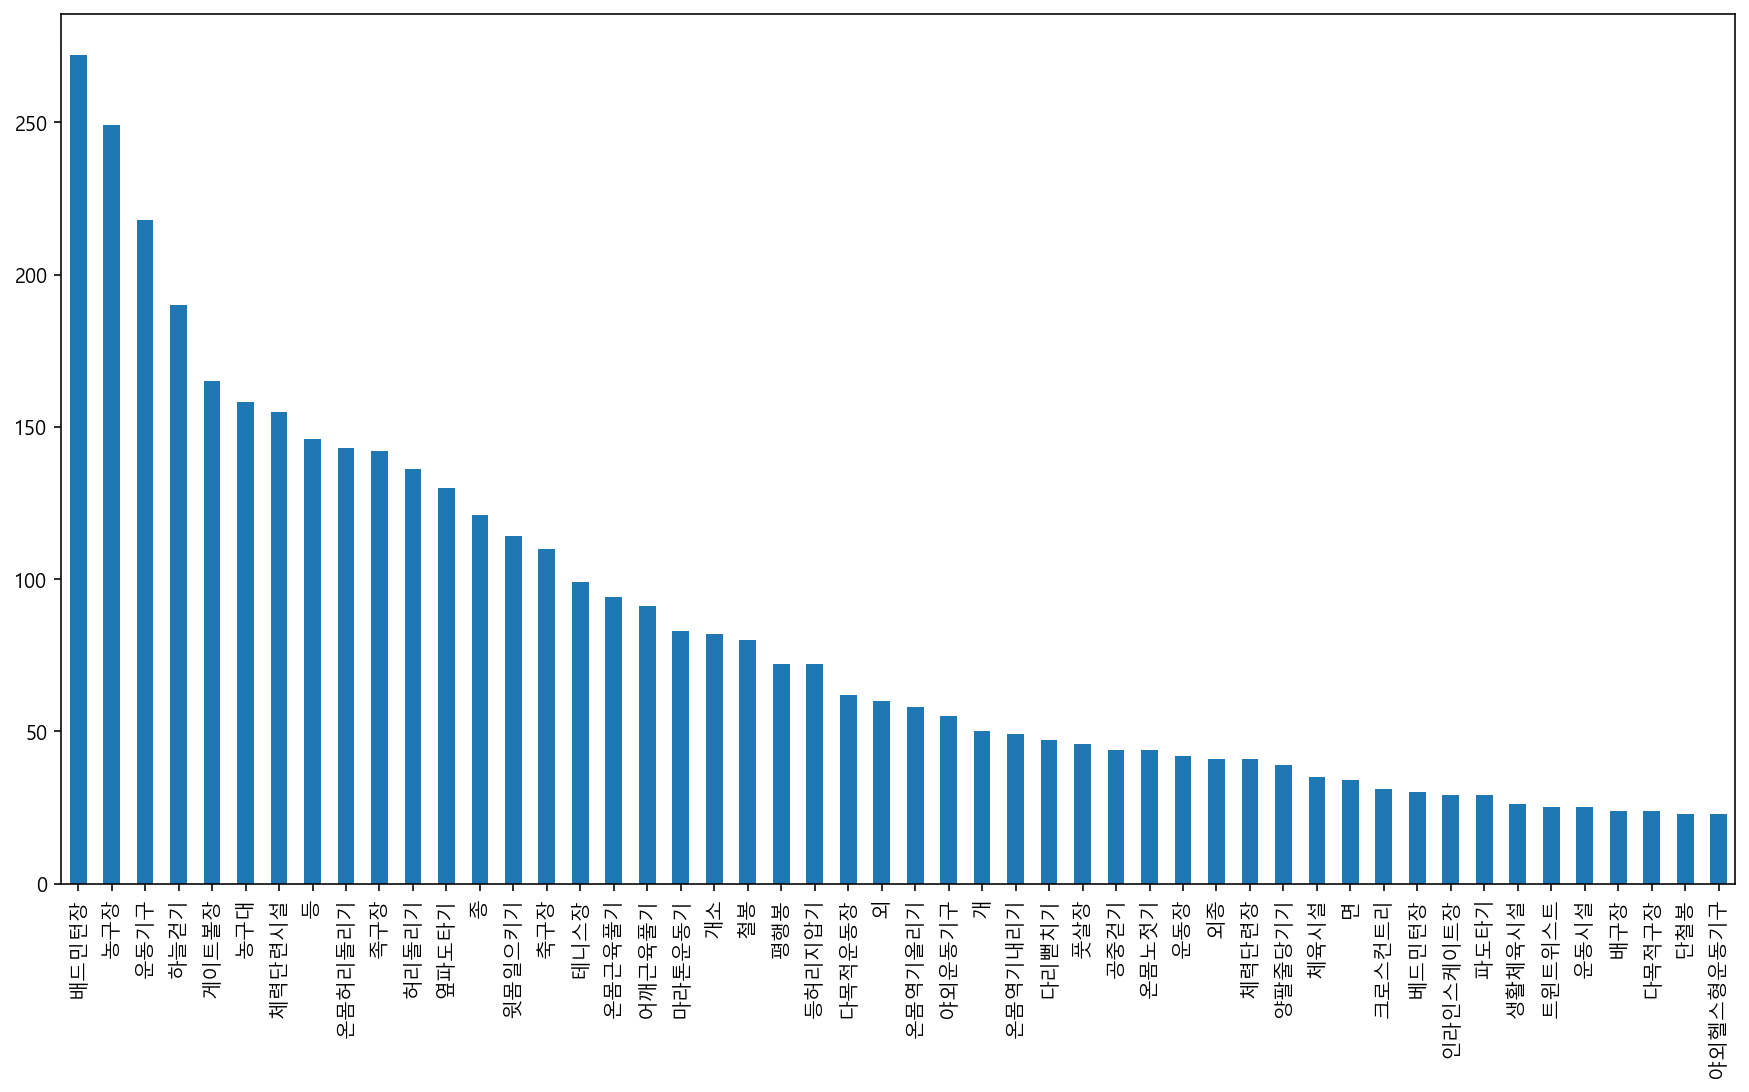

In [47]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.

gym_count.head(50).plot.bar(figsize = (15,8))

### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [48]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'
from wordcloud import WordCloud

def wordcloud(data, width = 1200, height =500):
    word_draw = WordCloud(font_path = r'C:\Windows\Fonts\malgun.ttf',
                stopwords = ['운동기구','다목적운동장','등','종','외 종','개소','면','외','외종'],
                background_color = 'white',
                width = width, height= height,
                         random_state = 42)
                
    word_draw.generate(data)

    plt.figure(figsize=(20,10))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

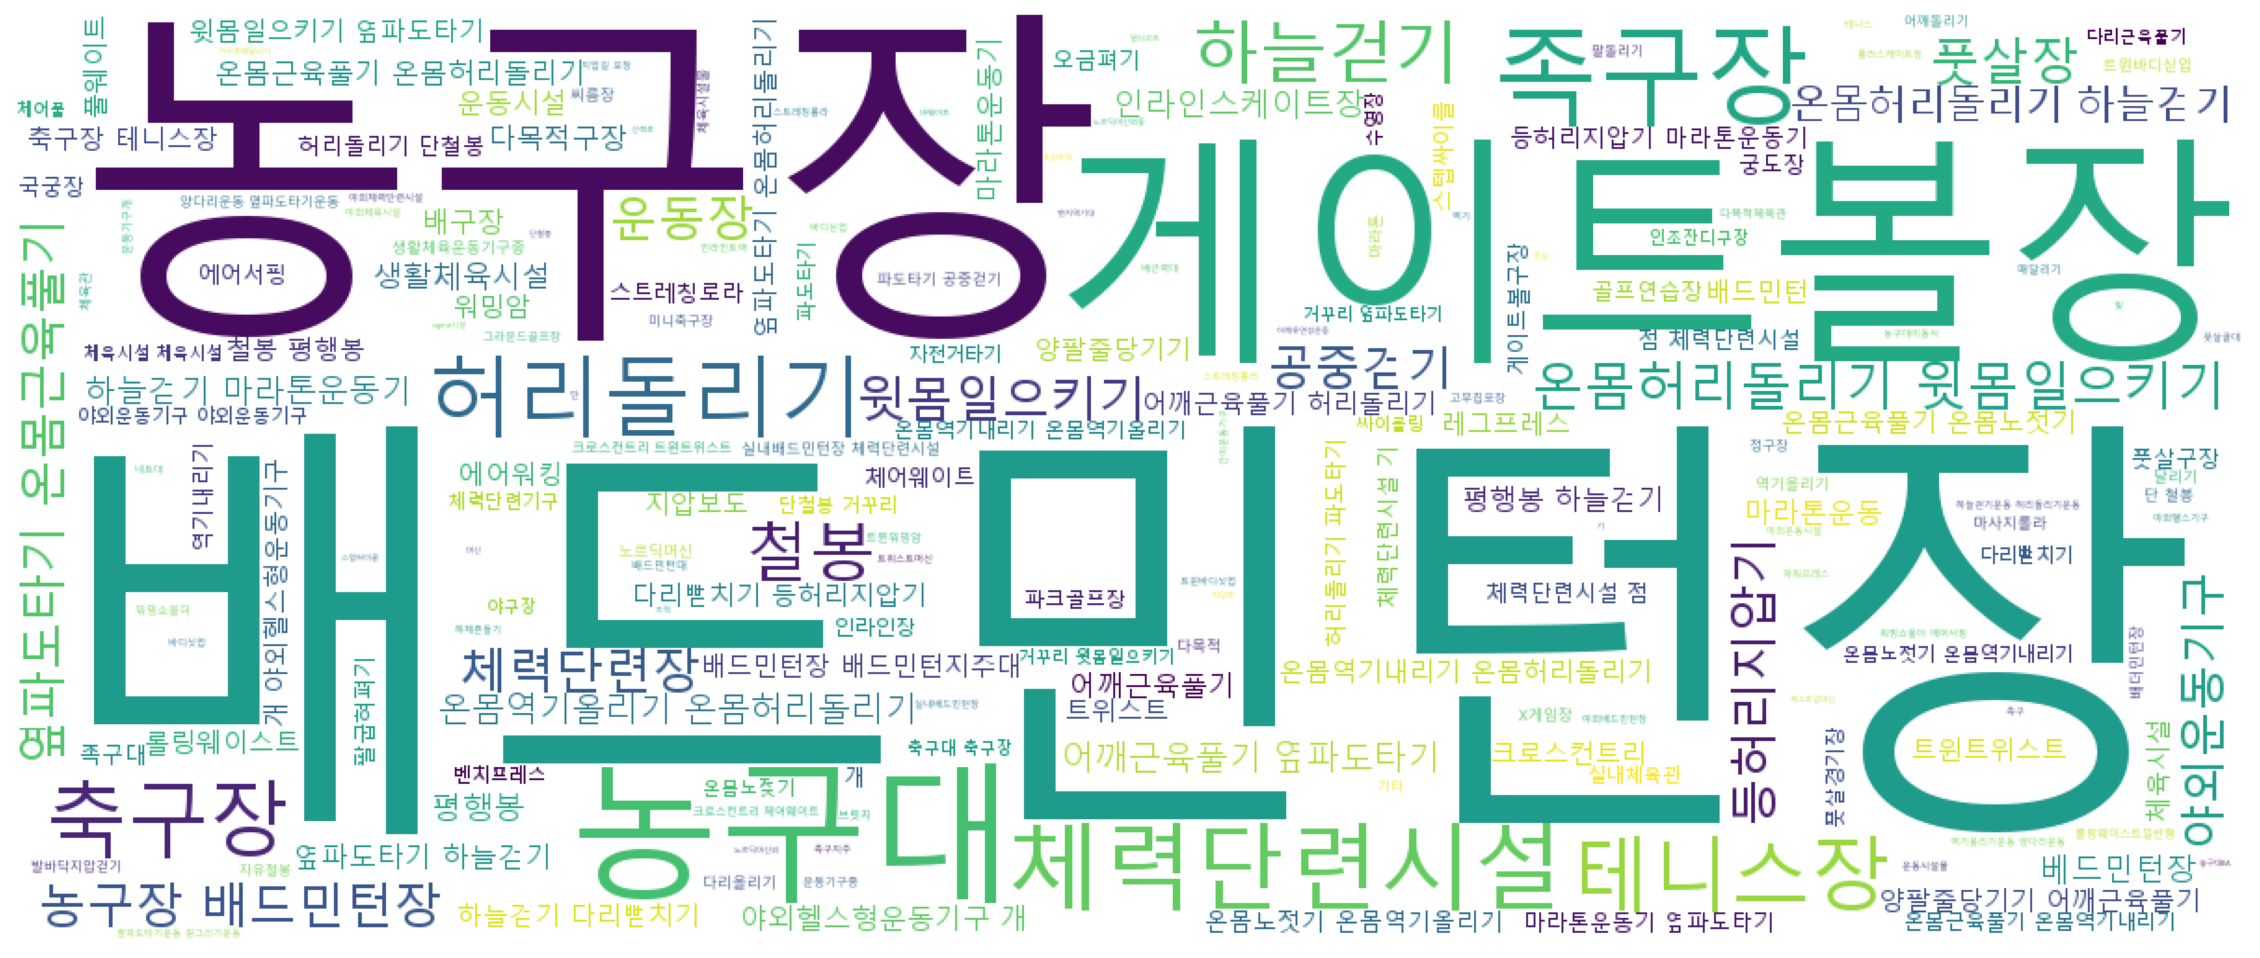

In [49]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.

wordcloud(gym)


### 편익시설

In [50]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.
def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/\+\㎡\(N)\·\(종)\(외)\(개소)\(개)\(동)]",',',text)
    text = re.sub(' ','',text)
    text = re.sub(",{2,}",',',text)
    return text

In [51]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.

get_string("[1. '화장실' 5, 2. 주차장, -, nan]")

',화장실,주차장,'

In [52]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.

get_string(np.nan)


nan

In [53]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.


df['편익시설'] = df['공원보유시설(편익시설)'].map(get_string)


In [54]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.

df['편익시설'].value_counts().tail()


정자,쉼터,화장실,주차장                     1
스탠드                               1
파고라,평의자,등의자,음수대,자전거거치대,지압판,평상,    1
자판기,음수대                           1
휴계쉼터                              1
Name: 편익시설, dtype: int64

In [55]:
type(np.nan)

float

In [56]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.

fac = ",".join(df.loc[df['편익시설'].notnull(), '편익시설'])
fac = get_string(fac)
fac[:1000]

'화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,생태관리사무,화장실,화장실,화장실,화장실,방문자센타,화장실,화장실,주차장,정문편의시설,문편의시설,매표,식당,편의시설,옥,화장실,공원조성기념탑,풍차,체육공원매점,매점,화장실,상수도관,파고라,벤치,주차장,파고라,조합놀이대,의자,조합놀이대,의자,파고라,조합놀이대,의자,조합놀이대,의자,화장실,파고라,조합놀이대,의자,파고라,조합놀이대,의자,파고라,조합놀이대,의자,음수대,파고라,조합놀이대,파고라,조합놀이대,의자,물놀이시설,파고라,조합놀이대,의자,그네,파고라,조합놀이대,의자,화장실,파고라,조합놀이대,파고라,조합놀이대,음수대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,의자,파고라,조합놀이대,화장실,화장실,주차장,화장실,화장실,화장실,주차장,화장실,휴게,전망대,음수장,음수대,화장실및샤워실,본부석,주차장,주차장,화장실,전망대,화장실,간이매점,화장실,간이매점,주차장,화장실,전망대,파고라,음수대,의자,주차장,화장실,파고라,음수대,의자,주차장,화장실,화장실,쉼터및휴게,등,표지및휴지통,화장실,주차장,의자,전망대,주차장,주차장,주차장,화장실,주차장,주차장,휴양림웰빙유스호스텔,웰빙유스호스텔,웰빙유스호스텔,안,호반유스호스텔,유스호스텔,숲속의집,관리안내,주차장,산림문화휴양관,약선음식레스토랑,전망테크쉽터,방문자센터,웰빙휴양관,전망테크쉽터,전망대,화장실,화장실,화장실,화장실,화장실,관리사무,파고라,조합놀이대,파고라,의자,조합놀이대,의자,파고라,조합놀이대,의자,조합놀이대,파고라,조합놀이대,조합놀이대,바닥분수,실버카페,광장,화장실,화장실,의자,북서울미술관,팔각정,조각품,노원평생학습관,바닥분수,화장실,축구장,테니스장,배드민턴장,주차장,화장실,화장실,화장실,화장실,농구장,화장실,화장실,화장실,화장실,주차장,화장실,화장실,음수대,음수대,자전거보관대,화장실,음수대,화장실,

In [57]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.

fac = str(df['편익시설'].tolist())
fac = get_string(fac)
fac = fac[1:]
fac

'화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,화장실,생태관리사무,화장실,화장실,화장실,화장실,방문자센타,화장실,화장실,주차장,정문편의시설,문편의시설,매표,식당,편의시설,옥,화장실,공원조성기념탑,풍차,체육공원매점,매점,화장실,상수도관,파고라,벤치,주차장,파고라,조합놀이대,의자,조합놀이대,의자,파고라,조합놀이대,의자,조합놀이대,의자,화장실,파고라,조합놀이대,의자,파고라,조합놀이대,의자,파고라,조합놀이대,의자,음수대,파고라,조합놀이대,파고라,조합놀이대,의자,물놀이시설,파고라,조합놀이대,의자,그네,파고라,조합놀이대,의자,화장실,파고라,조합놀이대,파고라,조합놀이대,음수대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,파고라,조합놀이대,의자,파고라,조합놀이대,화장실,화장실,주차장,화장실,화장실,화장실,주차장,화장실,휴게,전망대,음수장,음수대,화장실및샤워실,본부석,주차장,주차장,화장실,전망대,화장실,간이매점,화장실,간이매점,주차장,화장실,전망대,파고라,음수대,의자,주차장,화장실,파고라,음수대,의자,주차장,화장실,화장실,쉼터및휴게,등,표지및휴지통,화장실,주차장,의자,전망대,주차장,주차장,주차장,화장실,주차장,주차장,휴양림웰빙유스호스텔,웰빙유스호스텔,웰빙유스호스텔,안,호반유스호스텔,유스호스텔,숲속의집,관리안내,주차장,산림문화휴양관,약선음식레스토랑,전망테크쉽터,방문자센터,웰빙휴양관,전망테크쉽터,전망대,화장실,화장실,화장실,화장실,화장실,관리사무,파고라,조합놀이대,파고라,의자,조합놀이대,의자,파고라,조합놀이대,의자,조합놀이대,파고라,조합놀이대,조합놀이대,바닥분수,실버카페,광장,화장실,화장실,의자,북서울미술관,팔각정,조각품,노원평생학습관,바닥분수,화장실,축구장,테니스장,배드민턴장,주차장,화장실,화장실,화장실,화장실,농구장,화장실,화장실,화장실,화장실,주차장,화장실,화장실,음수대,음수대,자전거보관대,화장실,음수대,화장실,

In [58]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다.

re.sub(',{2,}','.','화장실,주차장,,,')

'화장실,주차장.'

In [59]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.


fac_count = pd.Series(fac[1:].split(',')).value_counts()
fac_count.head()

화장실    2107
파고라    1064
벤치      661
정자      577
주차장     561
dtype: int64

<AxesSubplot:>

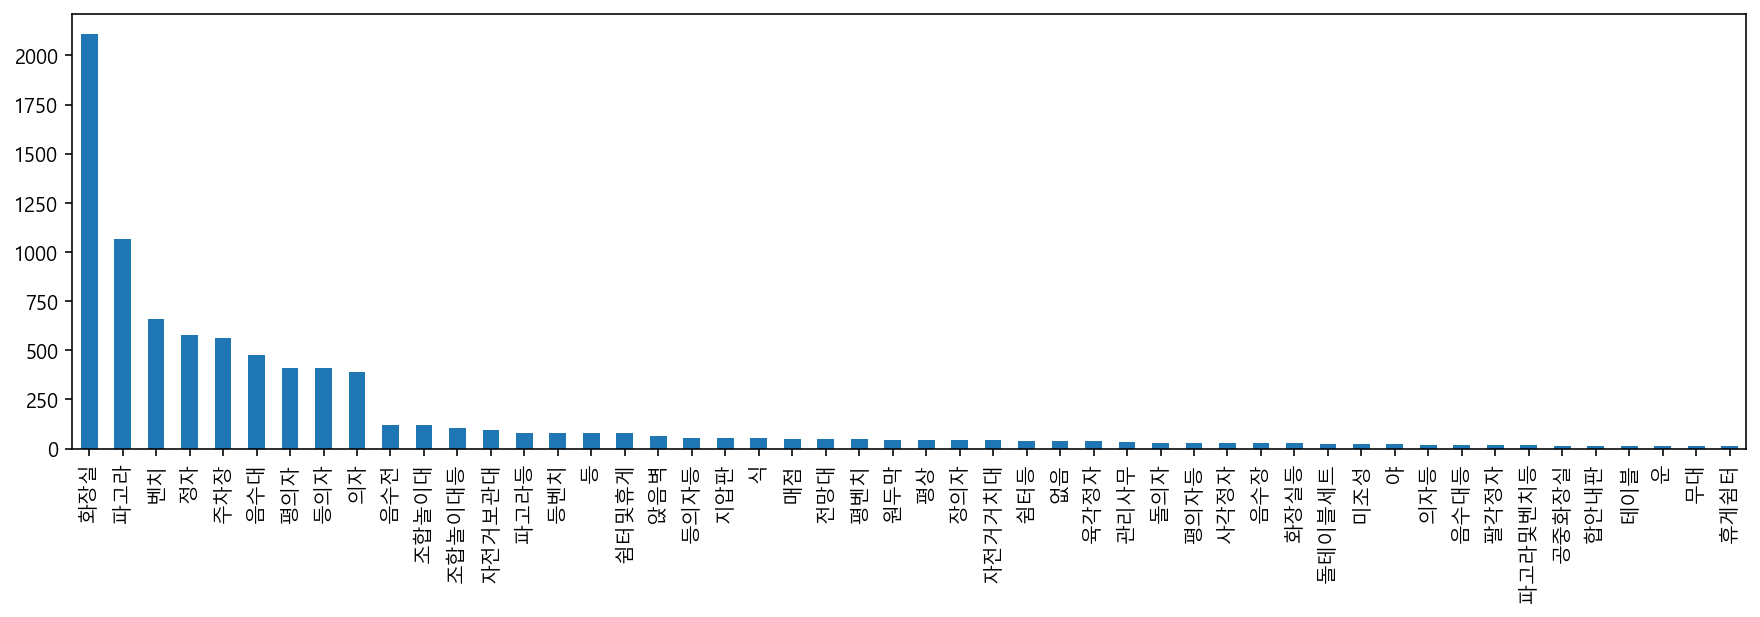

In [60]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.

fac_count.head(50).plot.bar(figsize=(15,4))

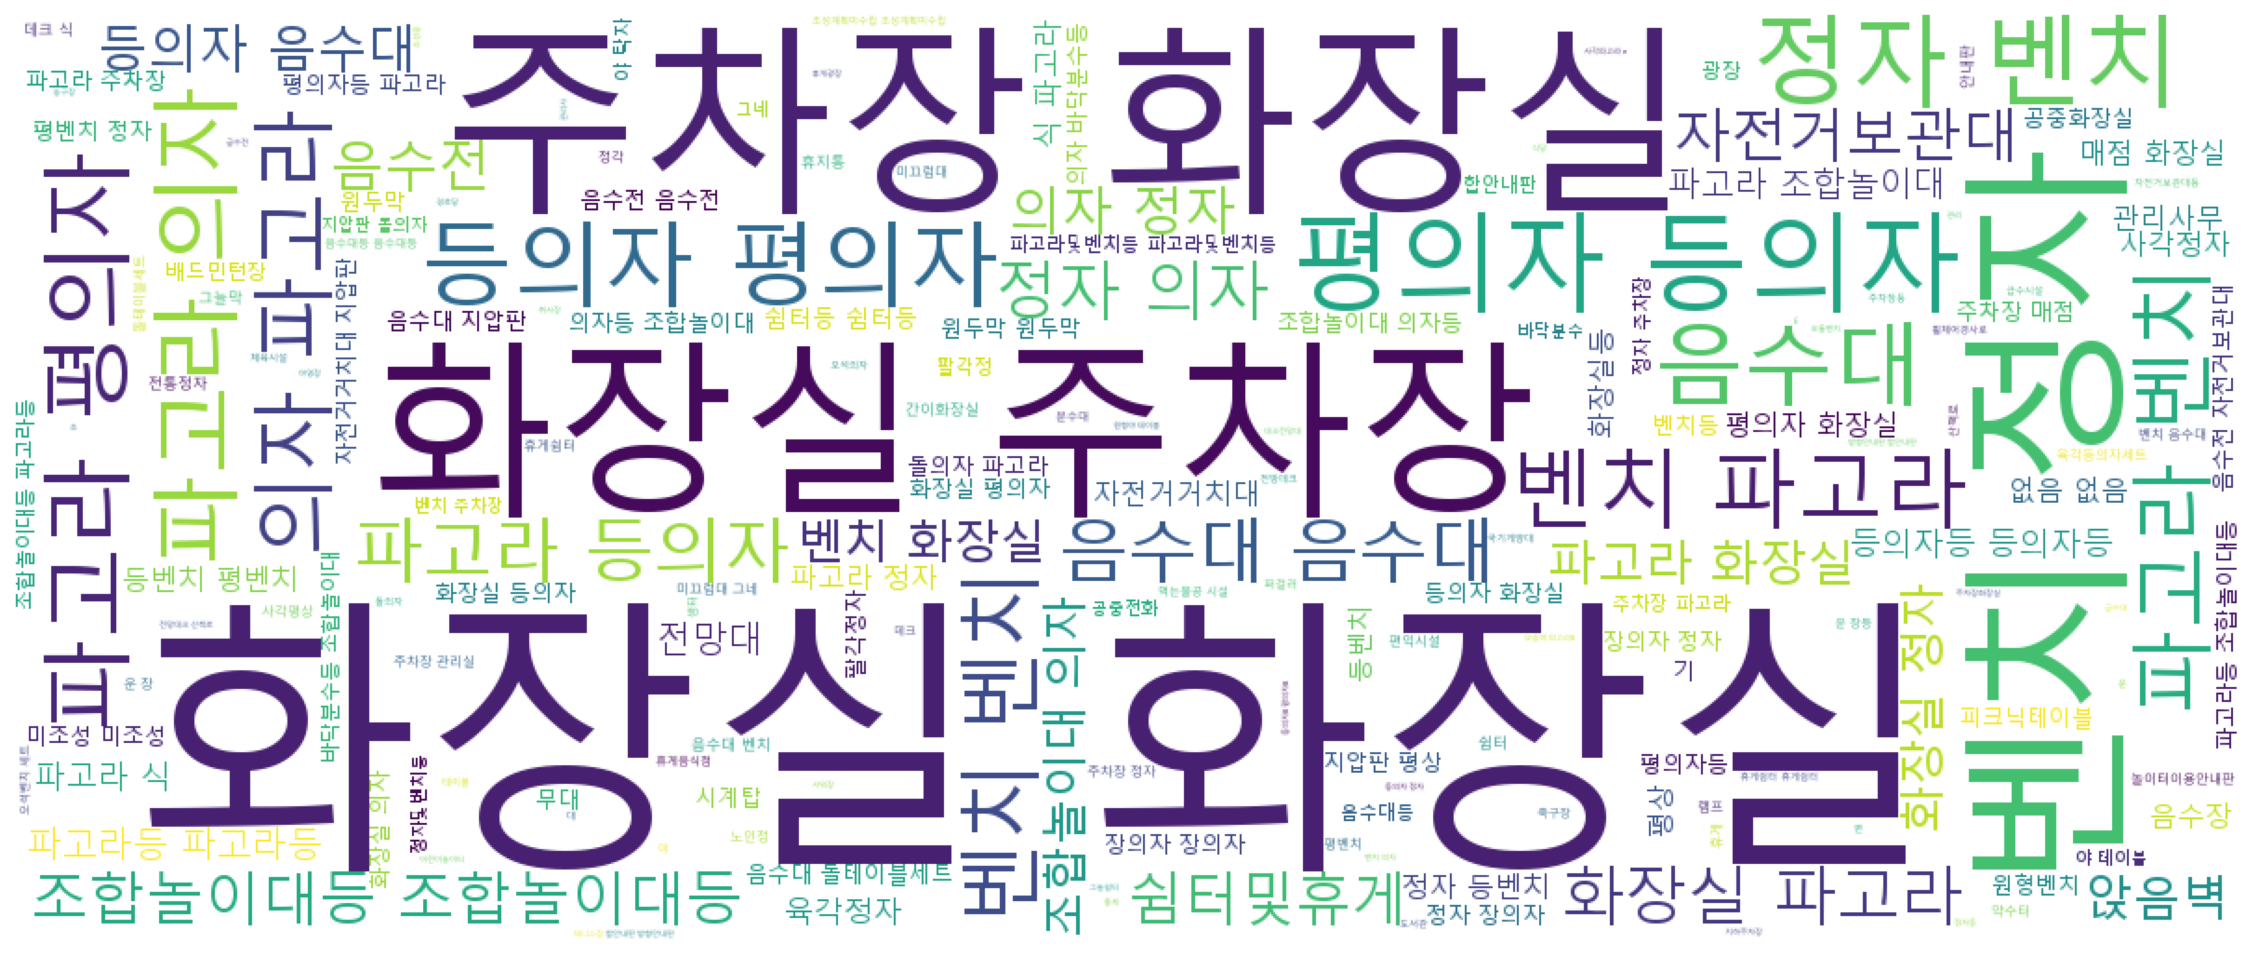

In [61]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.

wordcloud(fac)

### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [62]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.

facilities = ['화장실','주차장','음수대','파고라','정자','벤치','의자','놀이터','축구장','야영장','CCTV']

df_fac = df[df['공원보유시설(편익시설)'].notnull()]

In [63]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.

for f in facilities:
    df[f] = df_fac['공원보유시설(편익시설)'].str.contains(f)
    

In [64]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 
 
df[facilities].sum()



화장실     2170.0
주차장      565.0
음수대      497.0
파고라     1173.0
정자       674.0
벤치       805.0
의자      1092.0
놀이터       11.0
축구장        6.0
야영장        3.0
CCTV       0.0
dtype: float64

## 특정 정보 마스킹
### 전화번호 마스킹

In [65]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [66]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-123-5678")

'010-1**-**78'

In [67]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-12-5678")

'010-12-5678'

In [68]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "+82-10-1234-5678")

'+82-10-1234-5678'

In [69]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.

phone = "+82-10-1234-5678"
def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split('-')
    num_len = len(num) // 2
    
    num[num_len] = re.sub('\w','*',num[num_len])
    num[-1] = re.sub('(\d{2})(\d{2})',r'**\2', num[-1])
    
    return '-'.join(num)

mask_phone_number(phone)


'+82-10-****-**78'

In [70]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.

mask_phone_number(np.nan)

nan

In [71]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용합니다.

df['전화번호(전처리)'] = df['전화번호'].map(mask_phone_number)
df[['공원명','전화번호','전화번호(전처리)']].head()

,공원명,전화번호,전화번호(전처리)
0,달래공원,055-330-6989,055-***-**89
1,대동공원,055-330-4414,055-***-**14
2,대청공원,055-330-6989,055-***-**89
3,덕숭공원,055-330-4414,055-***-**14
4,덕정공원,055-330-6989,055-***-**89


### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [72]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"
re.sub('[^@.]','x',email) # @ 와 . 을 남기고 x 표시

'xxxxxxx@xxxx.xxx'

In [73]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"

address, domain = email.split('@')
mask = re.sub('\w', '*', address[1:-1])
print(f'{address[0]}{mask}{address[-1]}@{domain}')
print(email)

a*****s@mail.com
address@mail.com


In [74]:
# 위에서 작성한 예제를 함수로 만듭니다.
def mask_email(email):
    address, domain = email.split('@')
    mask = re.sub('\w', '*', address[1:-1])
    return f'{address[0]}{mask}{address[-1]}@{domain}'

mask_email(email)

'a*****s@mail.com'

In [75]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.


mask_email("1234address_123@gmail.com")

'1*************3@gmail.com'

### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [76]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "32가1234"

re.sub('([0-9])([가-힣])([\d])([\d]{2})([\d])',r'*\2\3**\5',car_num)

'3*가1**4'

In [77]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."
re.sub('([0-9])([가-힣])([\d])([\d]{2})([\d])',r'*\2\3**\5',car_num)

'안녕하세요. 자동차 등록 번호는 13*가1**4 입니다.'

# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [78]:
# data_types 변수에 데이터 타입만 따로 모으기

data_types = df.dtypes
data_types[:5]

관리번호        object
공원명         object
공원구분        object
소재지도로명주소    object
소재지지번주소     object
dtype: object

## 수치형 변수 요약

In [79]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.

var_numbers = data_types[data_types != object]
var_numbers = var_numbers.index.tolist()
var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

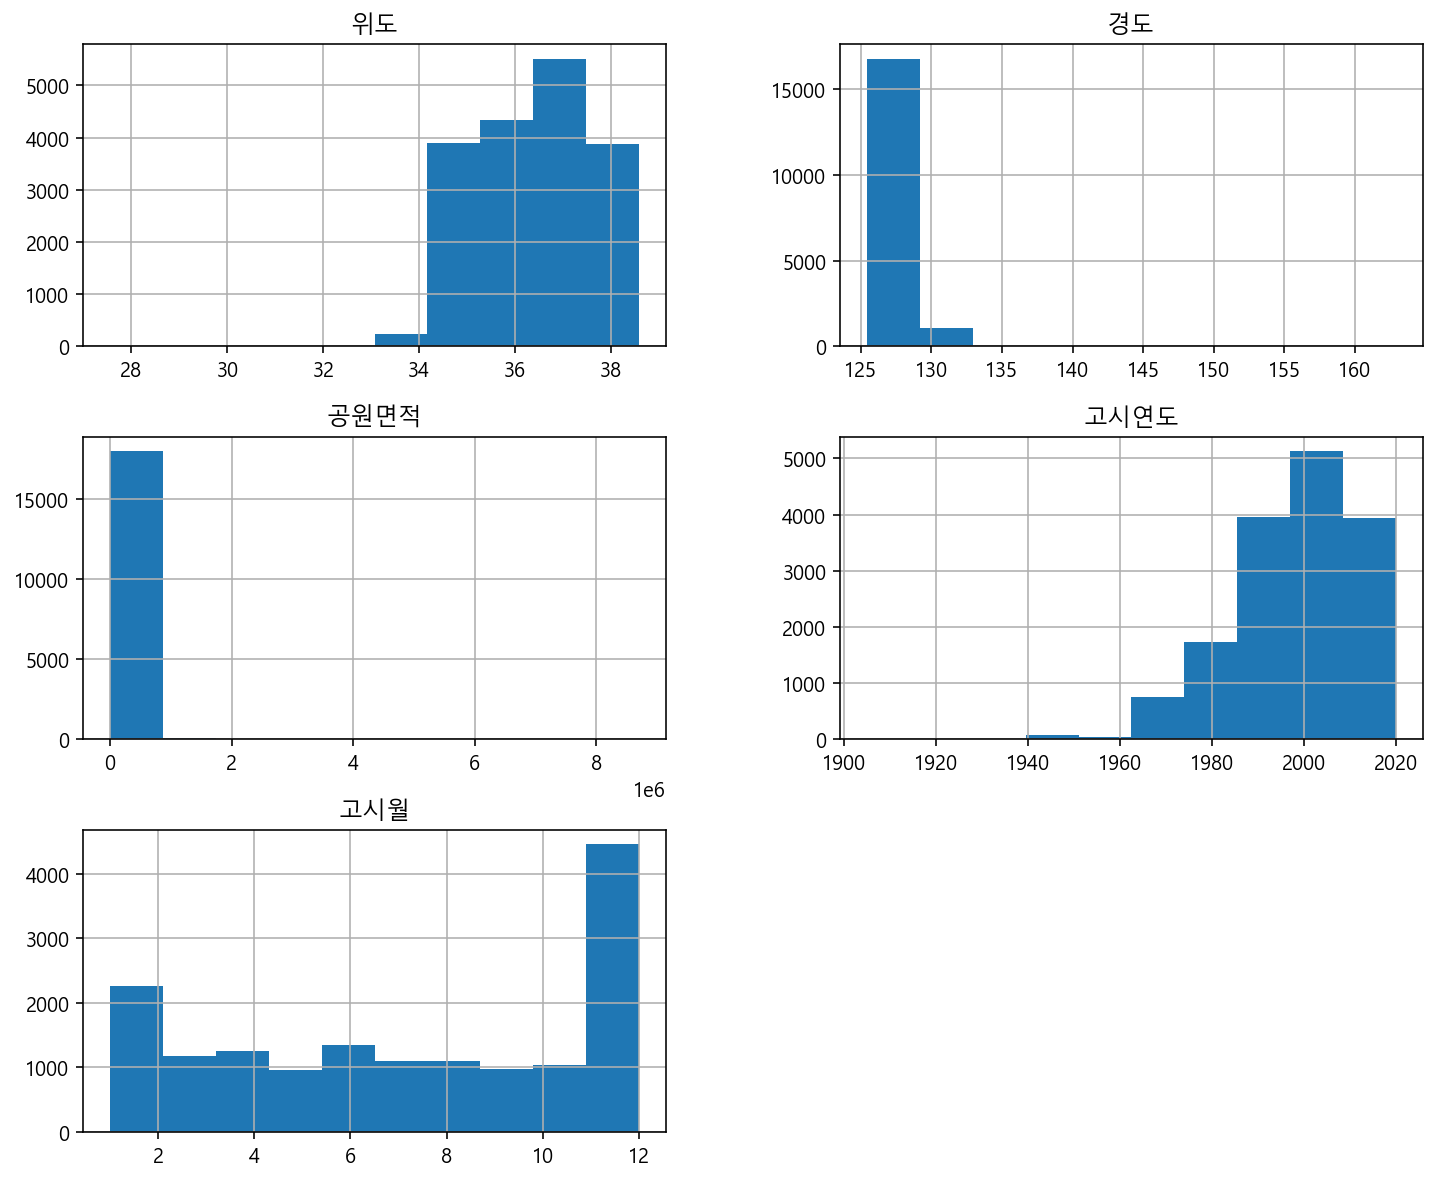

In [80]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.
h = df.hist(figsize=(12,10))


In [81]:
# describe 를 통해 요약합니다.

df.describe()


,위도,경도,공원면적,고시연도,고시월
count,17860.000000,17853.000000,1.809600e+04,15626.000000,15626.000000
mean,36.412736,127.497964,3.609481e+04,1998.029054,7.145527
std,1.062763,0.903100,2.159458e+05,13.614352,3.733276
min,27.551606,125.432215,0.000000e+00,1905.000000,1.000000
25%,35.371624,126.880616,1.505000e+03,1990.000000,4.000000
50%,36.552093,127.113905,2.210000e+03,2001.000000,7.000000
75%,37.443914,128.107858,1.031275e+04,2009.000000,11.000000
max,38.586685,162.920004,8.703000e+06,2020.000000,12.000000


## 범주형 변수 요약

In [82]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.

var_objects = data_types[data_types == object]
var_objects = var_objects.index.tolist()
var_objects[:5]

['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소']

In [83]:
df.describe(include='object')

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18096,18096,18096,18096,18096,4876,6623,5199,1126,2958,16863,16574,18096,18096,18096,18096,18056,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,16574
unique,15675,13441,13,16241,16123,1730,1399,1283,385,1056,323,527,148,238,238,17,250,897,2,2,2,2,2,2,2,2,2,2,1,417
top,31110-60001,공원,어린이공원,-,전라북도 전주시 덕진구 송천동 2가 377-66,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,061-749-6330,2020-07-16,6460000,전라남도,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,061-***-**30
freq,124,147,9770,40,7,256,1431,974,279,158,500,344,636,500,500,4011,500,974,3029,4634,4702,4026,4525,4394,4107,5188,5193,5196,5199,344


In [84]:
# 문자열 타입의 데이터 describe 로 요약하기
df[var_objects].describe()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,편익시설,화장실,주차장,음수대,파고라,정자,벤치,의자,놀이터,축구장,야영장,CCTV,전화번호(전처리)
count,18096,18096,18096,18096,18096,4876,6623,5199,1126,2958,16863,16574,18096,18096,18096,18096,18056,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,16574
unique,15675,13441,13,16241,16123,1730,1399,1283,385,1056,323,527,148,238,238,17,250,897,2,2,2,2,2,2,2,2,2,2,1,417
top,31110-60001,공원,어린이공원,-,전라북도 전주시 덕진구 송천동 2가 377-66,운동기구,조합놀이대,화장실,-,-,경상남도 창원시청,061-749-6330,2020-07-16,6460000,전라남도,경기도,창원시,화장실,False,False,False,False,False,False,False,False,False,False,False,061-***-**30
freq,124,147,9770,40,7,256,1431,974,279,158,500,344,636,500,500,4011,500,974,3029,4634,4702,4026,4525,4394,4107,5188,5193,5196,5199,344


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [85]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.
manage_category = pd.crosstab(index=df['관리기관명'], columns = df['공원구분'])
manage_category[manage_category['체육공원'] > 5].style.background_gradient()

공원구분,가로공원,근린공원,기타,도시농업공원,도시자연공원,도시자연공원구역,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,0,33,0,0,0,0,2,5,25,4,68,4,6
경기도 시흥시청,0,37,0,1,0,0,0,7,6,3,72,0,6
경상남도 창원시청,0,90,0,0,0,0,4,3,41,0,352,0,10
대전광역시 대덕구청,0,11,2,0,0,0,0,3,10,0,49,1,6
성남시 공원과,0,50,0,0,0,0,1,0,0,0,0,2,6
평택시청(공원과),0,118,0,1,0,0,1,8,58,31,213,3,7


In [86]:
# "시도" 별 "공원구분" 의 수를 구합니다.
city_category = pd.crosstab(index=df['시도'], columns=df['공원구분'])
city_category.style.background_gradient()

공원구분,가로공원,근린공원,기타,도시농업공원,도시자연공원,도시자연공원구역,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
시도,,,,,,,,,,,,,
강원도,0,146,8,1,0,2,1,9,138,11,407,5,8
경기도,0,1002,24,2,0,0,13,106,528,96,2115,37,88
경상남도,0,255,0,0,0,0,4,22,125,17,706,12,22
경상북도,0,179,3,0,0,0,0,19,108,28,577,11,7
광주광역시,0,208,0,1,0,0,3,3,79,9,540,9,4
대구광역시,0,136,4,0,0,0,1,6,61,8,385,3,10
대전광역시,0,99,2,0,0,0,1,12,49,12,314,1,9
부산광역시,0,153,17,1,0,0,2,19,107,8,383,3,3
서울특별시,2,350,121,2,0,0,1,21,209,4,1137,13,4


# 시도별 공원 분포

## 시도별 공원 비율

In [87]:
# 시도별로 합계 데이터를 출력

city_count = df['시도'].value_counts().to_frame()
city_mean = df['시도'].value_counts(normalize=True).to_frame()
city_count.head()

,시도
경기도,4011
서울특별시,1864
전라남도,1589
충청남도,1297
경상남도,1163


In [88]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.

city = city_count.merge(city_mean, left_index = True, right_index=True)
city.columns = ['합계', '비율']
city.style.background_gradient()

,합계,비율
경기도,4011,0.221651
서울특별시,1864,0.103006
전라남도,1589,0.087809
충청남도,1297,0.071673
경상남도,1163,0.064268
전라북도,1116,0.061671
경상북도,932,0.051503
충청북도,887,0.049016
광주광역시,856,0.047303
울산광역시,793,0.043822


## 공원구분별 분포

<AxesSubplot:xlabel='경도', ylabel='위도'>

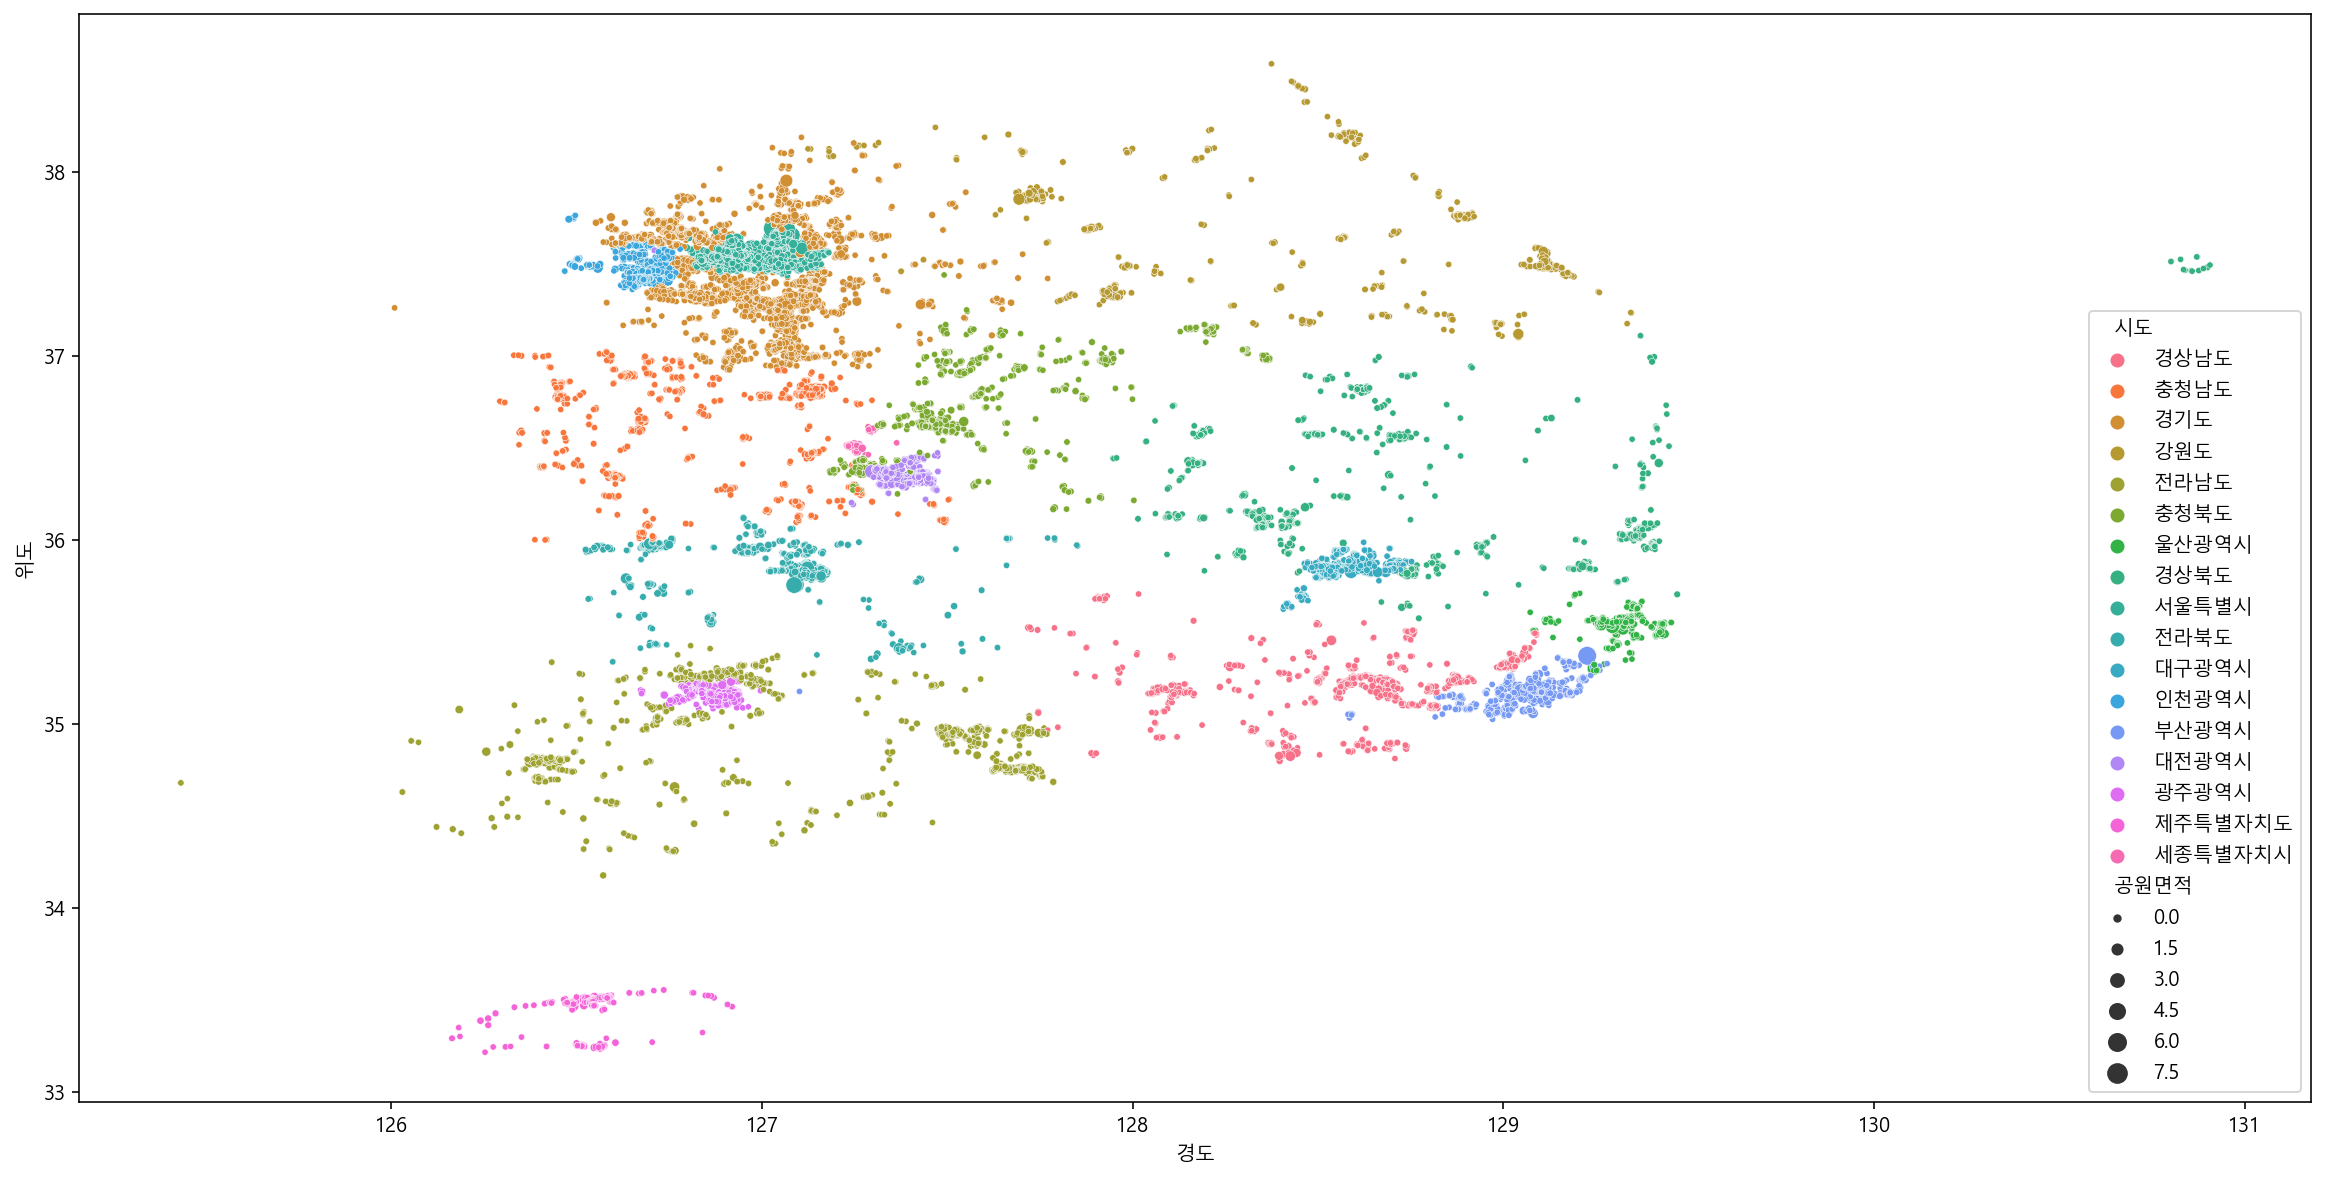

In [89]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.

df['공원구분'].value_counts()
plt.figure(figsize=(20,10))
sns.scatterplot(data = df_park, x = '경도', y= '위도', hue = '시도', size = '공원면적', sizes = (10,100))

## 시도별 공원분포

In [90]:
city_count.index

Index(['경기도', '서울특별시', '전라남도', '충청남도', '경상남도', '전라북도', '경상북도', '충청북도', '광주광역시',
       '울산광역시', '강원도', '인천광역시', '부산광역시', '대구광역시', '대전광역시', '제주특별자치도',
       '세종특별자치시'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='시도'>

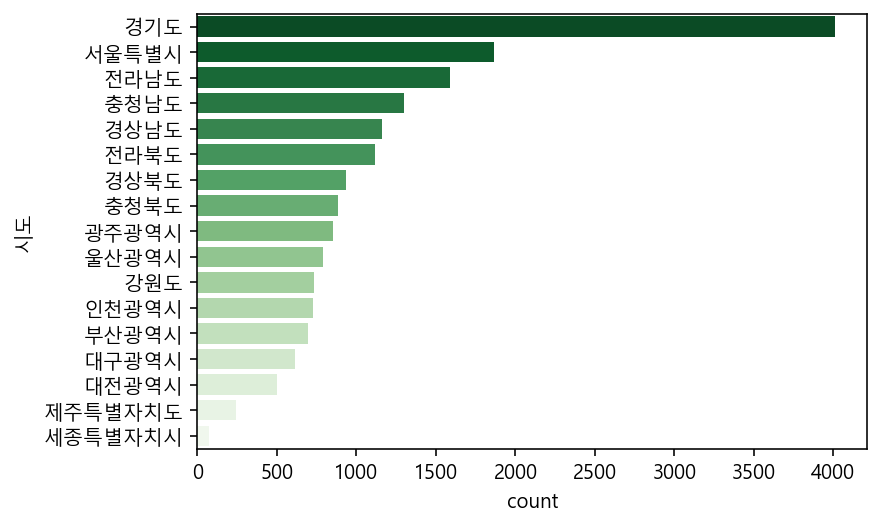

In [91]:

# countplot 으로 시도별 빈도수를 그립니다.
sns.countplot(data = df, y='시도', order = city_count.index, palette='Greens_r')


https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## 특정 공원구분 가져오기

In [92]:
# "공원구분"별로 빈도수를 구합니다.

park_type = r'.*((역사|체육|수변|문화)공원).*'

In [93]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*' # . : 0번이상 반복 , * : 모든 문자

park = df[df['공원구분'].str.match(park_type)]
park.shape

(1086, 36)

In [94]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.

var_numbers

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

In [95]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 

var_pair = var_numbers
var_pair = var_pair.append('공원구분')
var_pair = var_pair[0:7]
var_pair

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list

var_pair.remove('지정고시일')
var_pair.remove('고시연도')
var_pair.remove('고시월')
var_pair

In [ ]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.
sns.pairplot(data = park[var_pair], hue='공원구분')

## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [ ]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.

park_size = pd.pivot_table(df, index='시도', values='공원면적', aggfunc = ['count','mean','median'])
park_size.style.background_gradient(cmap='Blues')

## 내가 사는 지역의 공원을 지도에 표시해 보기

In [ ]:
# 경기도 성남시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.

df_bc = df[(df['시도'] == '경기도') & (df['구군'] == '부천시') & (df['경도'].notnull())] # 변경이 아니라 사용만 할 것이기에 굳이 copy() 쓸 필요 없음.
df_bc.isnull().sum()

df_bc

In [ ]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.

df_bc[['시도','구군','공원명']]

### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [ ]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.

df_bc.loc[df_bc['공원명'].str.contains('역곡'),['공원명','위도','경도']]


In [ ]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 

cols = '공원보유시설(운동시설)	공원보유시설(유희시설)	공원보유시설(편익시설)	공원보유시설(교양시설)	공원보유시설(기타시설)'
cols = cols.split('\t')

df_bc.loc[df_bc['공원명'].str.contains('역곡'), cols]

###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [ ]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

import folium

m = folium.Map([37.488332,126.801948], zoom_start = 15)

for n in df_bc.index:
    lat = df_bc.loc[n, '위도']
    long = df_bc.loc[n, '경도']
    tooltip = df_bc.loc[n, '공원명']+ '공원' + ' - ' + df_bc.loc[n, '소재지도로명주소']
    folium.Marker([lat, long], tooltip = tooltip).add_to(m)
m.save('yeok_park.html')
m